<a href="https://colab.research.google.com/github/aaaven/aiarts2020/blob/master/week12-tutorial/Test_CycleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

# Install

In [1]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2238, done.
remote: Total 2238 (delta 0), reused 0 (delta 0), pack-reused 2238
Receiving objects: 100% (2238/2238), 8.04 MiB | 5.45 MiB/s, done.
Resolving deltas: 100% (1449/1449), done.


In [0]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [4]:
# !wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1lEDFK757PKpcc6mWcDqh9a7x3J9qCiOn' -O 'sketch2shanshui.zip'

!pip install gdown
!gdown https://drive.google.com/uc?id=1lEDFK757PKpcc6mWcDqh9a7x3J9qCiOn

Downloading...
From: https://drive.google.com/uc?id=1lEDFK757PKpcc6mWcDqh9a7x3J9qCiOn
To: /content/pytorch-CycleGAN-and-pix2pix/sketch2shanshui.zip
211MB [00:00, 259MB/s]


In [5]:
!unzip 'sketch2shanshui.zip'

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/sketch2shanshui/trainB/._4_of_5_in_086-a.jpg  
  inflating: sketch2shanshui/trainB/2_of_5_in_03-a.jpg  
  inflating: __MACOSX/sketch2shanshui/trainB/._2_of_5_in_03-a.jpg  
  inflating: sketch2shanshui/trainB/0_of_3_in_SS1164-b.jpg  
  inflating: __MACOSX/sketch2shanshui/trainB/._0_of_3_in_SS1164-b.jpg  
  inflating: sketch2shanshui/trainB/2_of_3_in_SS0393-a.jpg  
  inflating: __MACOSX/sketch2shanshui/trainB/._2_of_3_in_SS0393-a.jpg  
  inflating: sketch2shanshui/trainB/4_of_9_in_SS1212-b.jpg  
  inflating: __MACOSX/sketch2shanshui/trainB/._4_of_9_in_SS1212-b.jpg  
  inflating: sketch2shanshui/trainB/1_of_3_in_082-a.jpg  
  inflating: __MACOSX/sketch2shanshui/trainB/._1_of_3_in_082-a.jpg  
  inflating: sketch2shanshui/trainB/14_of_23_in_06.jpg  
  inflating: __MACOSX/sketch2shanshui/trainB/._14_of_23_in_06.jpg  
  inflating: sketch2shanshui/trainB/1_of_4_in_03.jpg  
  inflating: __MACOSX/sketch2shanshui/trainB/._1_

In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 686kB 5.8MB/s 
     |████████████████████████████████| 204kB 16.4MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp36-none-any.whl size=655250 sha256=00052fd47bce1456f4dd2f3c1bb92c5632330a7c102392ffdf89dd340a5adfaa
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp36-none-any.whl size=5712 sha256=75d45d212d76b973426c2321b2167ff17942759b36b2ea1592638a7461503c47
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [0]:
# !bash ./datasets/download_cyclegan_dataset.sh horse2zebra

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [0]:
# !bash ./scripts/download_cyclegan_model.sh horse2zebra

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [0]:
!python train.py --dataroot ./sketch2shanshui --name sketch2shanshui --model cycle_gan --checkpoints_dir /content/drive/My\ Drive/0-Colab-Assets/cyclegan

# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [5]:
!python test.py --dataroot /content/drive/My\ Drive/0-Colab-Assets/cyclegan/sketch2shanshui/testA --name sketch2shanshui --model test --no_dropout --checkpoints_dir /content/drive/My\ Drive/0-Colab-Assets/cyclegan --results_dir /content/drive/My\ Drive/0-Colab-Assets/cyclegan

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/drive/My Drive/0-Colab-Assets/cyclegan	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/drive/My Drive/0-Colab-Assets/cyclegan/sketch2shanshui/testA	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                 

# Visualize

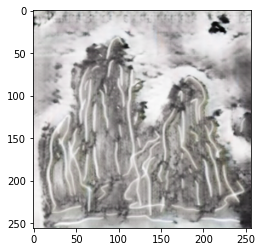

In [7]:
import matplotlib.pyplot as plt

img = plt.imread('/content/drive/My Drive/0-Colab-Assets/cyclegan/sketch2shanshui/test_latest/images/0_fake.png')
plt.imshow(img)

In [0]:
# import matplotlib.pyplot as plt

# img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_1010_real.png')
# plt.imshow(img)